# Table Of Content :-

- 1- Import libraries
- 2- Read the dataset files
- 3- Show Data Brief of DataFrame
- 4- Data Exploration 
- 5- EDA 
- 6- preprocessing and feature scaling
- 7- ML Model
- 8- Conclusion And insights
- 9- Model Deployment

## 1) Import libraries:-

In [2]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# ingnore Errors
import warnings
warnings.filterwarnings("ignore")

## 2) Read the dataset files:-

In [3]:
# Read CSV file as dataframe called data 

data = pd.read_csv(r'C:\Users\dell\Desktop\powerbi projects\datasets\Hr_dataset\HR_data.csv')

## 3) Show Data Brief of DataFrame:-

In [4]:
# Print top 5 Rows 

data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,Mid,Medium,No,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,Mid,Medium,No,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,Mid,Medium,No,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,Mid,Small,Yes,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,Senior,Medium,No,Stayed


In [6]:
# Print last 5 Rows 

data.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,Yes,66,Bachelor’s Degree,Single,Senior,Small,No,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,No,42,Associate Degree,Single,Senior,Medium,No,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,Yes,34,Master’s Degree,Married,Entry,Small,No,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,No,62,Bachelor’s Degree,Single,Entry,Large,No,Left
59597,15796,56,Male,19,Technology,6660,Good,High,Average,0,Yes,20,Master’s Degree,Married,Mid,Medium,No,Stayed


## 4) Data Exploration And Preprocessing :-

In [31]:
# Show The Size And The Shape Of Data

print("Size  of Data : ",data.size)
print("Shape of Data : ",data.shape)

Size  of Data :  1072764
Shape of Data :  (59598, 18)


In [15]:
# Get information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Employee ID           59598 non-null  int64 
 1   Age                   59598 non-null  int64 
 2   Gender                59598 non-null  object
 3   Years at Company      59598 non-null  int64 
 4   Job Role              59598 non-null  object
 5   Monthly Income        59598 non-null  int64 
 6   Work-Life Balance     59598 non-null  object
 7   Job Satisfaction      59598 non-null  object
 8   Performance Rating    59598 non-null  object
 9   Number of Promotions  59598 non-null  int64 
 10  Overtime              59598 non-null  object
 11  Distance from Home    59598 non-null  int64 
 12  Education Level       59598 non-null  object
 13  Marital Status        59598 non-null  object
 14  Job Level             59598 non-null  object
 15  Company Size          59598 non-null

 > % The data is 59598 Rows and  18 Columns  (12 Column is string and 6 Columns are int64)

### - Metadata:-

- 1- Employee ID: Unique employee identifier.
- 2- Age: Employee’s age in years.
- 3- Gender: Employee’s gender (Male/Female).
- 4- Years at Company: Total years worked at company.
- 5- Job Role: Employee’s job title.
- 6- Monthly Income: Monthly salary amount.
- 7- Work-Life Balance:  Rating (Poor,Fair,Good,Excellent).
- 8- Job Satisfaction:   Rating from (Low,Medium,High,Very High).
- 9- Performance Rating: Rating from (Low,Below Average,Average,High).
- 10- Number of Promotions: Total promotions received.
- 11- Overtime: Works overtime? (Yes/No)
- 12- Distance from Home: Distance to workplace in kilometer KM.
- 13- Education Level: Education level (Associate,High School,Bachelor,Master’s,PhD).
- 14- Marital Status: Marital status (Single/Married/Divorced).
- 15- Job Level: Job seniority level (Entry,Mid,Senior).
- 16- Company Size: Company size category (Medium,Small,Large).
- 17- Remote Work: Works remotely? (Yes/No)
- 18- Attrition: Employee left company? (Stayed/Left) — Target variable.

In [28]:
# print all columns

data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status', 'Job Level',
       'Company Size', 'Remote Work', 'Attrition'],
      dtype='object')

In [27]:
# Identify which columns are categorical and which are numerical

categorical = data.select_dtypes(include='object').columns.tolist()
numerical   = data.select_dtypes(include='int64').columns.tolist()

print("Categorical :",categorical)
print("-------------------------")
print("Numerical   :",numerical)

Categorical : ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Attrition']
-------------------------
Numerical   : ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home']


### - Check Missing Values and Duplicates:-

In [4]:
# Check Missing Values

data.isna().sum()

Employee ID             0
Age                     0
Gender                  0
Years at Company        0
Job Role                0
Monthly Income          0
Work-Life Balance       0
Job Satisfaction        0
Performance Rating      0
Number of Promotions    0
Overtime                0
Distance from Home      0
Education Level         0
Marital Status          0
Job Level               0
Company Size            0
Remote Work             0
Attrition               0
dtype: int64

In [40]:
# Check Duplicated Values

data.duplicated().sum()

0

``There is no any Missing Values or duplicates,The Data is Clean And Ready For The Analysis And Modeling``

In [36]:
# Get Some Statistical info about data  

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,59598.0,37227.118729,21519.150028,1.0,18580.25,37209.5,55876.75,74498.0
Age,59598.0,38.565875,12.079673,18.0,28.00,39.0,49.00,59.0
Years at Company,59598.0,15.753901,11.245981,1.0,7.00,13.0,23.00,51.0
Monthly Income,59598.0,7302.397983,2151.457423,1316.0,5658.00,7354.0,8880.00,16149.0
Number of Promotions,59598.0,0.832578,0.994991,0.0,0.00,1.0,2.00,4.0
Distance from Home,59598.0,50.007651,28.466459,1.0,25.00,50.0,75.00,99.0


``There are not Accurate data in Years at Company the work life already start from 18y to 60y (about 42 years),
    So we delete any Years at Company more than 42 because this is outlier``

In [5]:
# Calcualte How many Employee stay more than 42 years at company 

(data['Years at Company']>42).value_counts()

False    58270
True      1328
Name: Years at Company, dtype: int64

In [6]:
# Delete All this Employee because this isnot Accurate

data = data[data['Years at Company']<=42].dropna()

In [7]:
# Calcualte How many Employee stay more than 42 years at company After Drop

(data['Years at Company']>42).value_counts()

False    58270
Name: Years at Company, dtype: int64

In [11]:
# Get Some Statistical info about data  

data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home
count,58270.000000,58270.000000,58270.000000,58270.000000,58270.000000,58270.000000
mean,37214.679114,38.162279,15.073417,7302.594749,0.833877,50.016681
std,21527.383947,11.908993,10.414809,2152.195065,0.995484,28.467335
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000
25%,18563.500000,28.000000,7.000000,5657.000000,0.000000,25.000000
50%,37194.500000,38.000000,13.000000,7354.000000,1.000000,50.000000
75%,55878.750000,48.000000,22.000000,8882.000000,2.000000,75.000000
max,74498.000000,59.000000,42.000000,16149.000000,4.000000,99.000000


## 5) Exploratory Data Analysis:-

In [149]:
# Show all columns 

data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status', 'Job Level',
       'Company Size', 'Remote Work', 'Attrition', 'AgeGroup'],
      dtype='object')

In [69]:
# Top 5 Rows

data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition,AgeGroup
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,Mid,Medium,No,Stayed,26-35
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,Mid,Medium,No,Stayed,46-60
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,Mid,Medium,No,Stayed,18-25
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,Mid,Small,Yes,Stayed,36-45
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,Senior,Medium,No,Stayed,46-60


In [150]:
# Finding how many unique values are in the dataset

data.nunique()

Employee ID             58220
Age                        42
Gender                      2
Years at Company           42
Job Role                    5
Monthly Income           9492
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Number of Promotions        5
Overtime                    2
Distance from Home         99
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Attrition                   2
AgeGroup                    4
dtype: int64

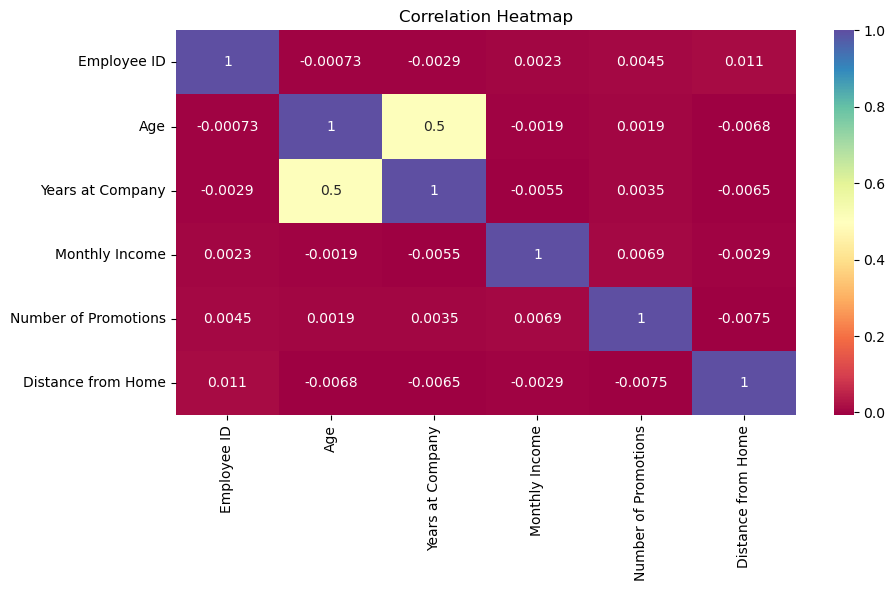

In [115]:
# Show Relationships between data variables  
# Calculate correlation matrix

corr = data.corr()

# figure Size
plt.figure(figsize=(10,5))

sns.heatmap(corr,cmap='Spectral',annot=True)
plt.title("Correlation Heatmap")
plt.show()

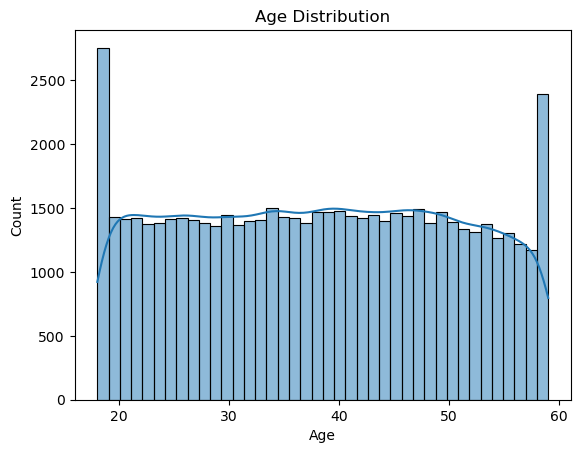

In [70]:
# Show the Age Distribution in the data

sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [155]:
# print all ages

a1 = data['Age'].median()
a2 = data['Age'].min()
a3 = data['Age'].max()

print('Avarege age = ',a1,"Years")
print('minimum age = ',a2,"  Years")
print('maxmum  age = ',a3,"  Years")

Avarege age =  38.0 Years
minimum age =  18   Years
maxmum  age =  59   Years


``Avarege Age = 38 years``

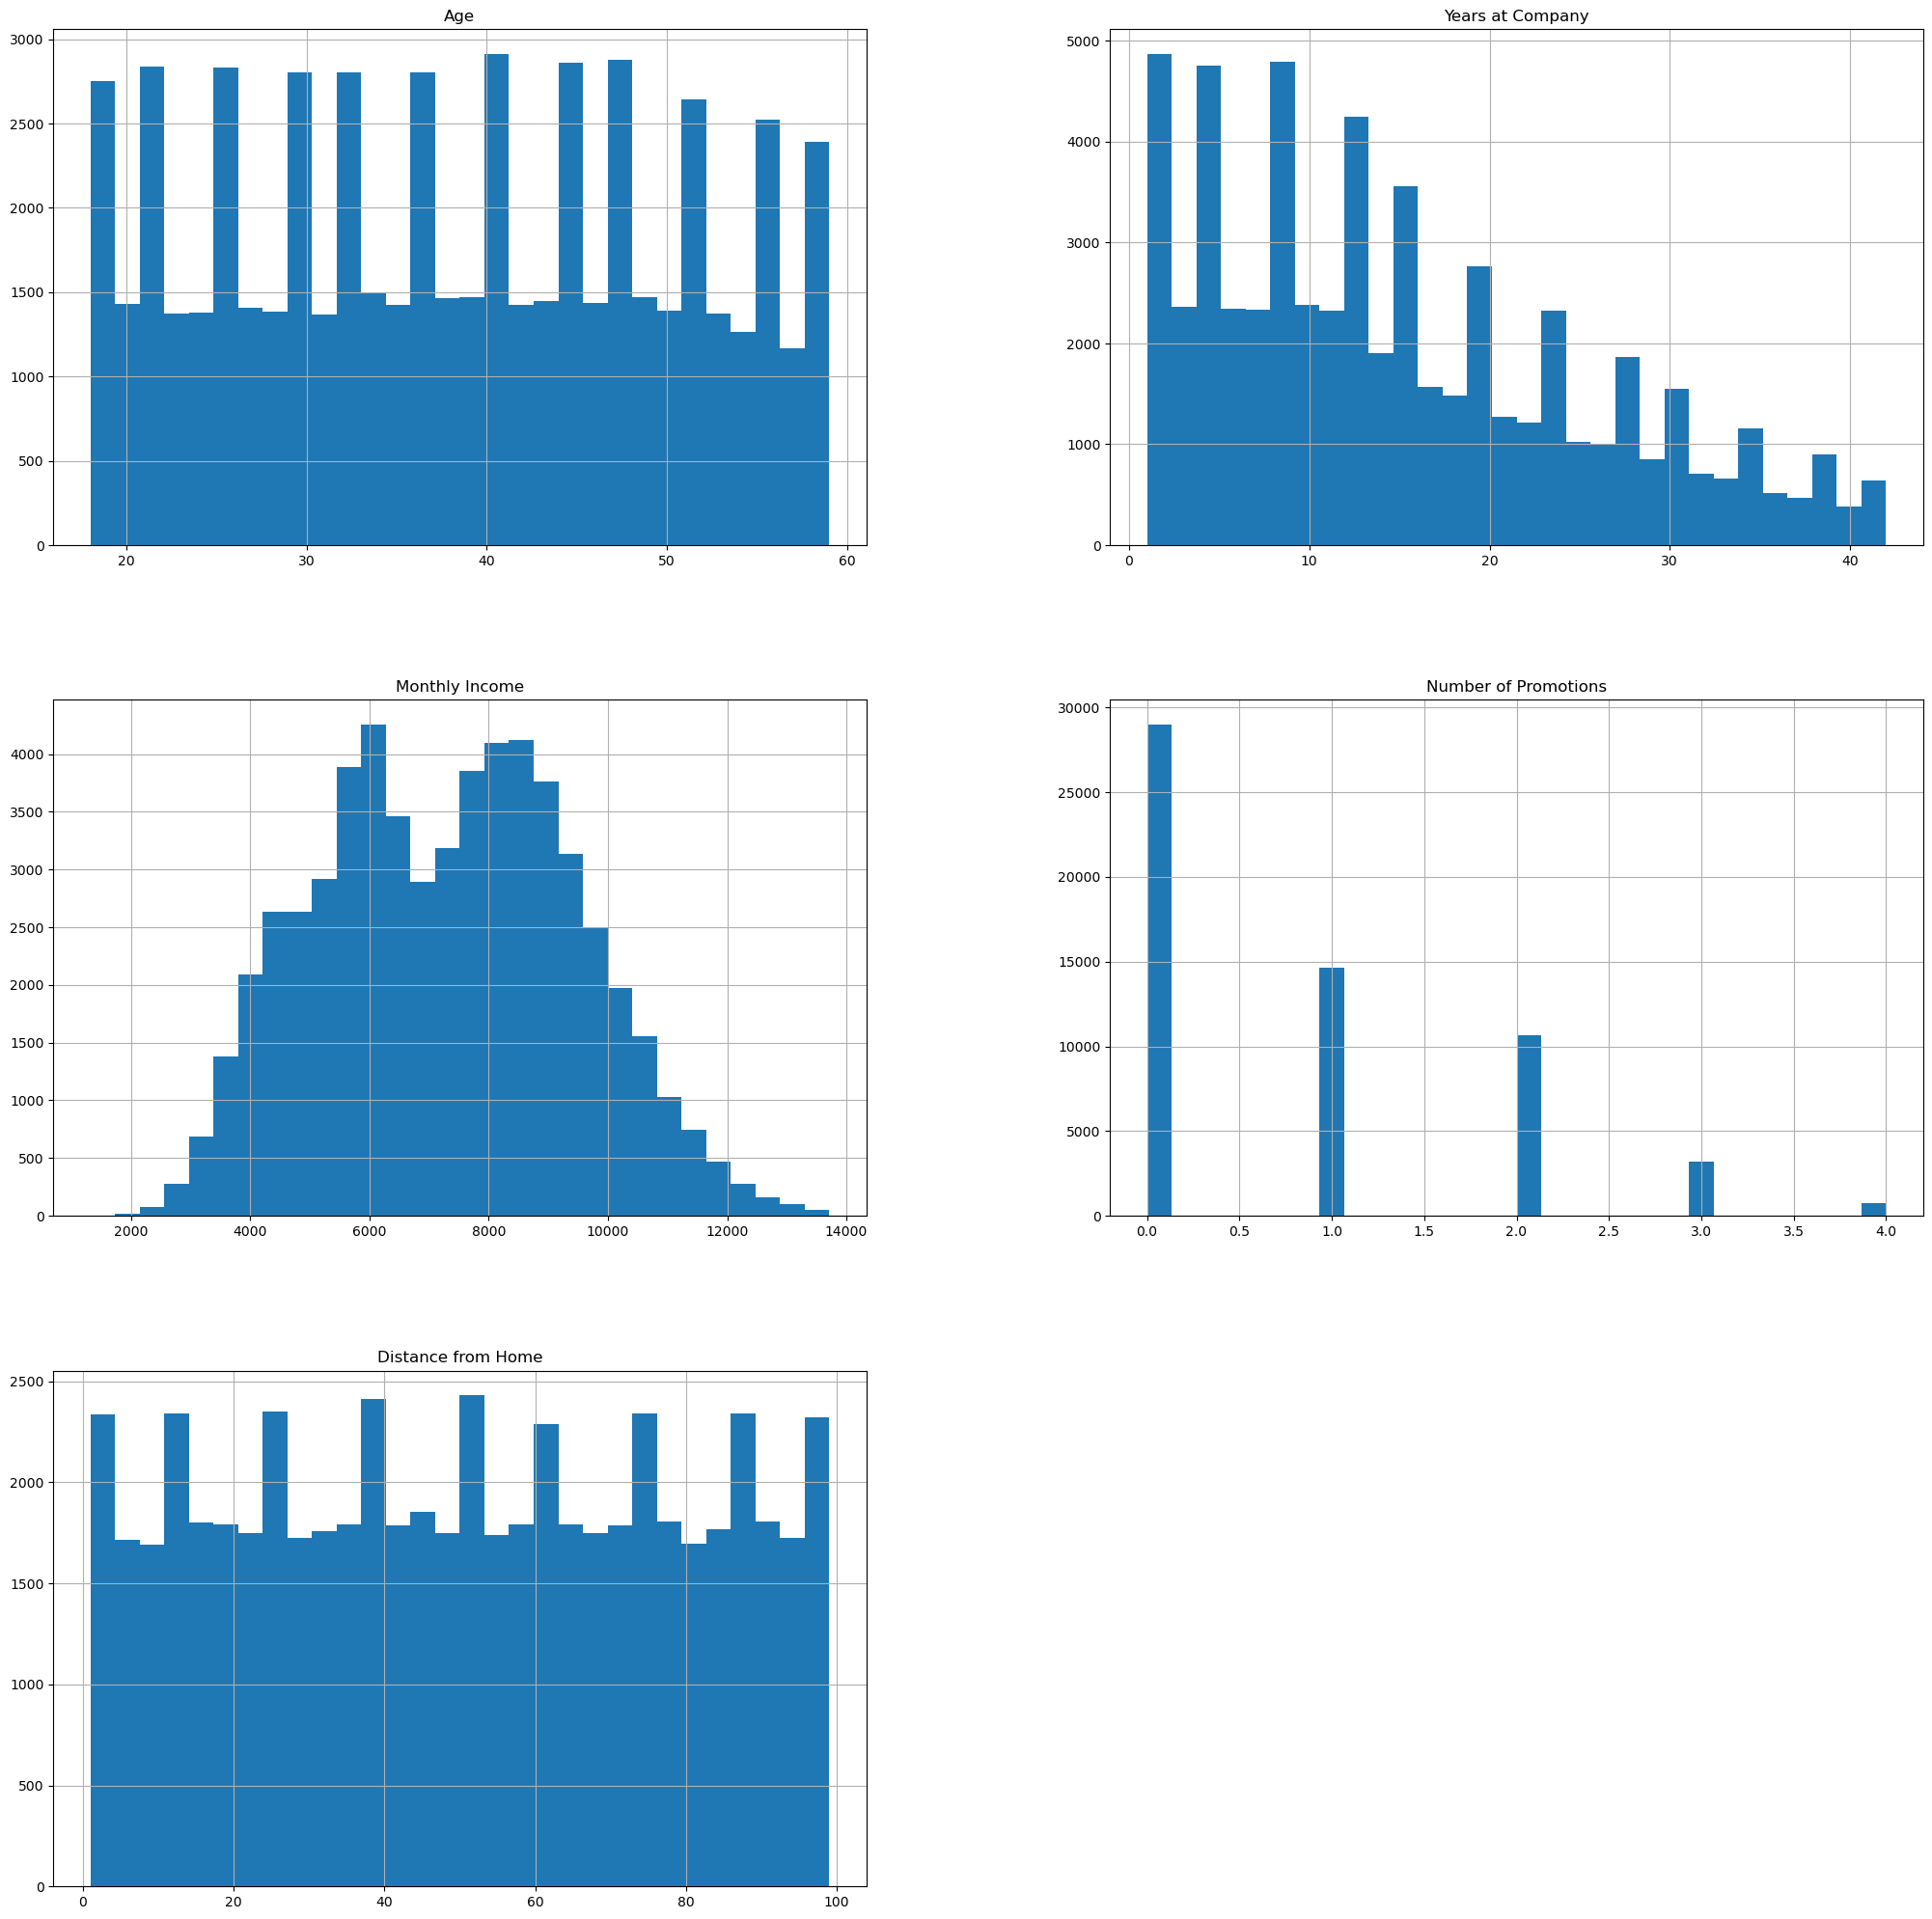

In [18]:
## histogram for all Numerical Attributes

data[['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home']].hist(bins=30 , figsize=(25,25))
plt.show()

In [38]:
# Calculate The Attrition Rate

print("Attrition Rate (%):")
print(data['Attrition'].value_counts(normalize=True) * 100)

Attrition Rate (%):
Stayed    52.363137
Left      47.636863
Name: Attrition, dtype: float64


In [21]:
# Gender values

g1 = data['Gender'].value_counts().index 
g1

Index(['Male', 'Female'], dtype='object')

In [22]:
# Gender Distribuation  

g2 = data['Gender'].value_counts().values
g2

array([31982, 26238], dtype=int64)

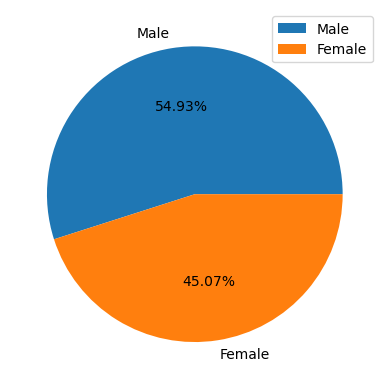

In [23]:
## Visualize the sex in pie chart

type_show   = ['Male','Female']
Value_count = [31982,  26238]
plt.pie(Value_count,labels=type_show,autopct="%2.2f%%")
plt.legend()
plt.show()

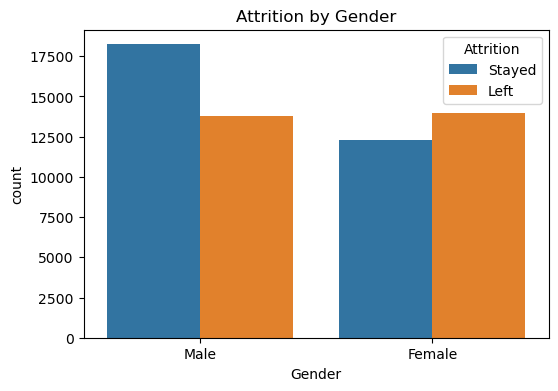

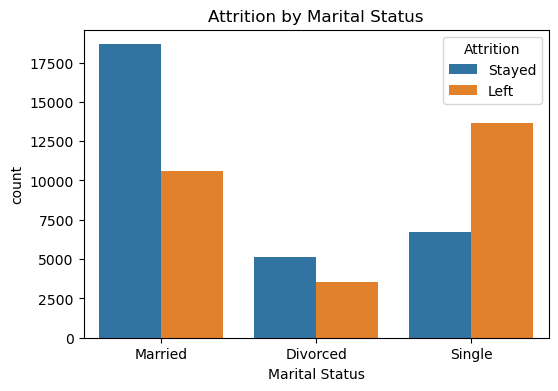

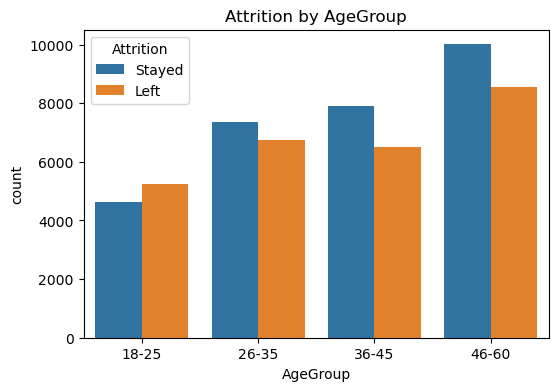

In [8]:
# Seperate Age into Groups

data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 60], labels=["18-25", "26-35", "36-45", "46-60"])

for col in ['Gender', 'Marital Status', 'AgeGroup']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='Attrition')
    plt.title(f'Attrition by {col}')
    plt.show()

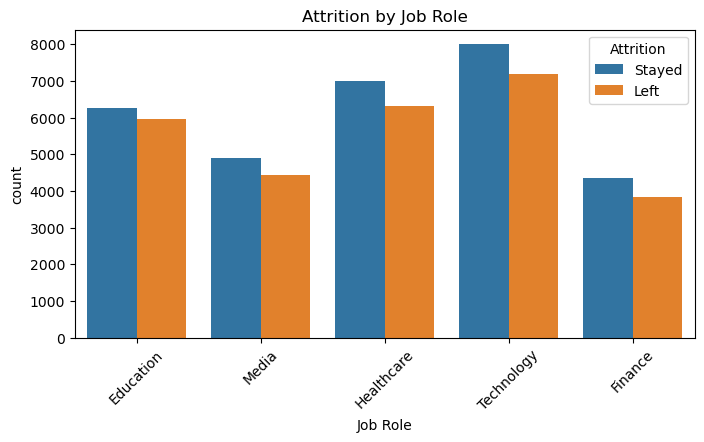

In [43]:
# Attrition by Job Role

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Job Role', hue='Attrition')
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

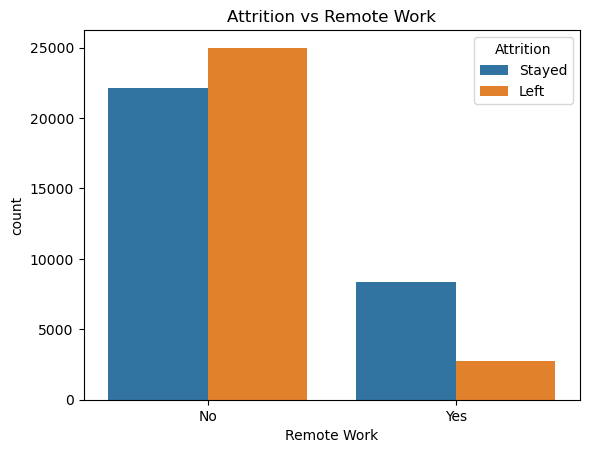

In [44]:
# Attrition by Remote Work

sns.countplot(data=data, x='Remote Work', hue='Attrition')
plt.title("Attrition vs Remote Work")
plt.show()

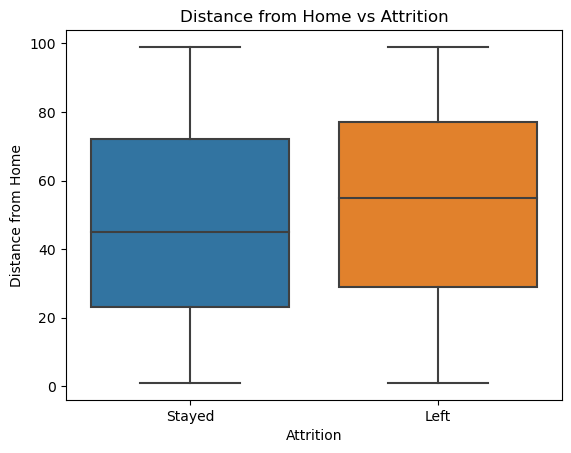

In [45]:
# Attrition by Distance from Home

sns.boxplot(data=data, x='Attrition', y='Distance from Home')
plt.title("Distance from Home vs Attrition")
plt.show()

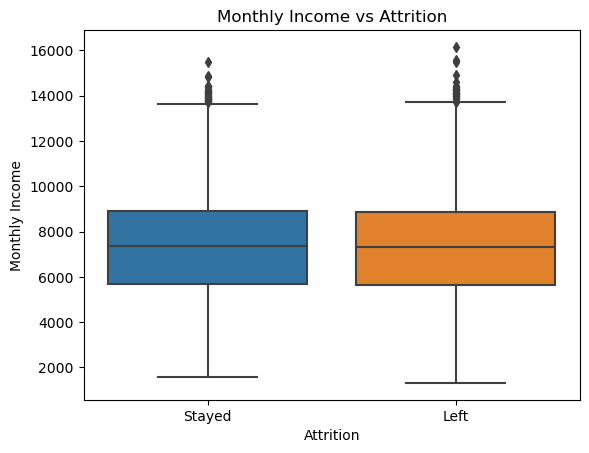

In [46]:
# Attrition by Monthly Income

sns.boxplot(data=data, x='Attrition', y='Monthly Income')
plt.title("Monthly Income vs Attrition")
plt.show()

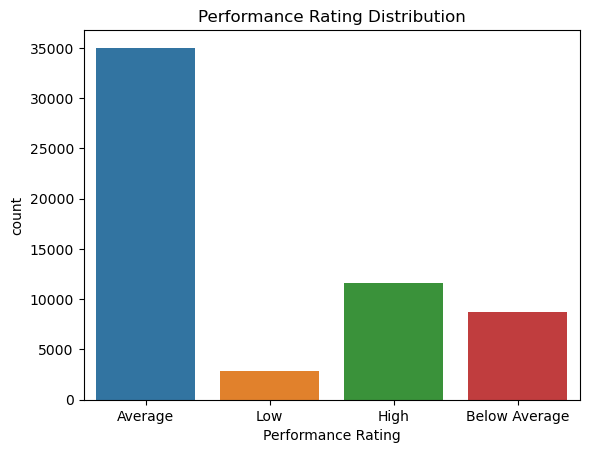

In [52]:
# Show Performance Rating Distribution

sns.countplot(data=data, x='Performance Rating')
plt.title("Performance Rating Distribution")
plt.show()

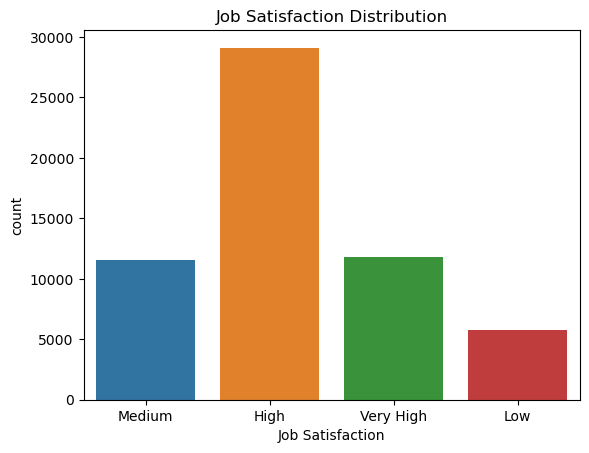

In [59]:
# Show Job Satisfaction Distribution

sns.countplot(data=data, x='Job Satisfaction')
plt.title("Job Satisfaction Distribution")
plt.show()

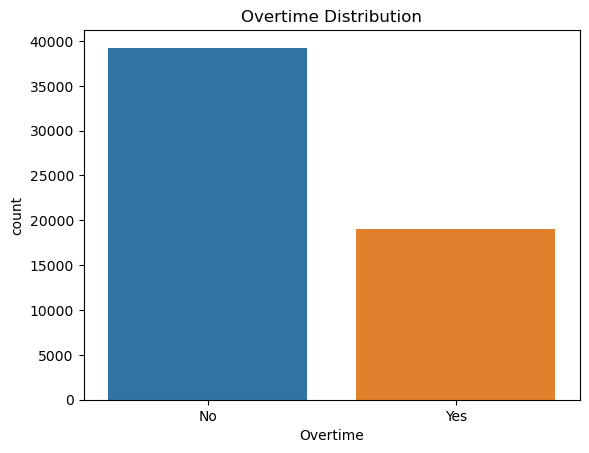

In [67]:
# Show Overtime Distribution

sns.countplot(data=data, x='Overtime')
plt.title("Overtime Distribution")
plt.show()

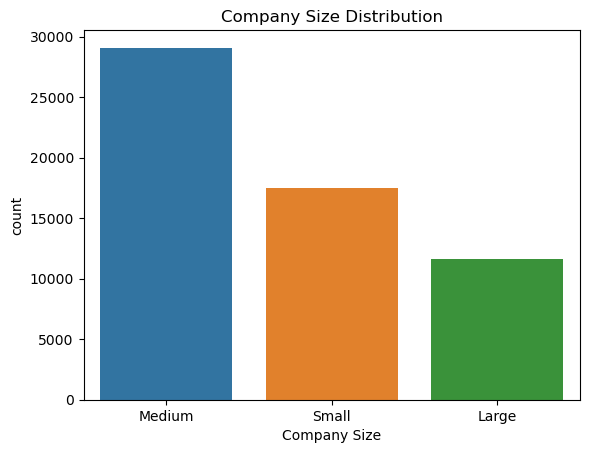

In [66]:
# Show Company Size Distribution

sns.countplot(data=data, x='Company Size')
plt.title("Company Size Distribution")
plt.show() 

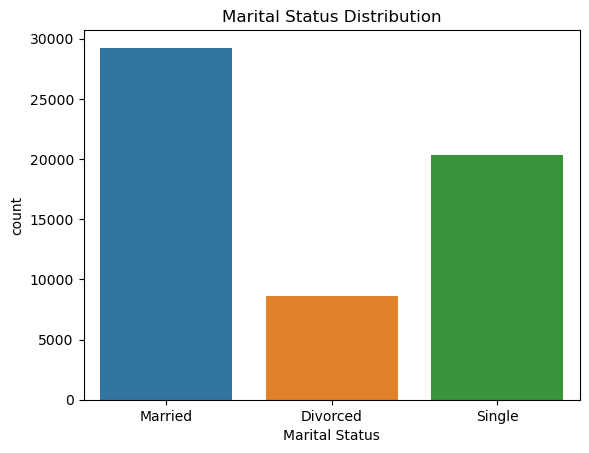

In [65]:
# Show Marital Status Distribution

sns.countplot(data=data, x='Marital Status')
plt.title("Marital Status Distribution")
plt.show() 

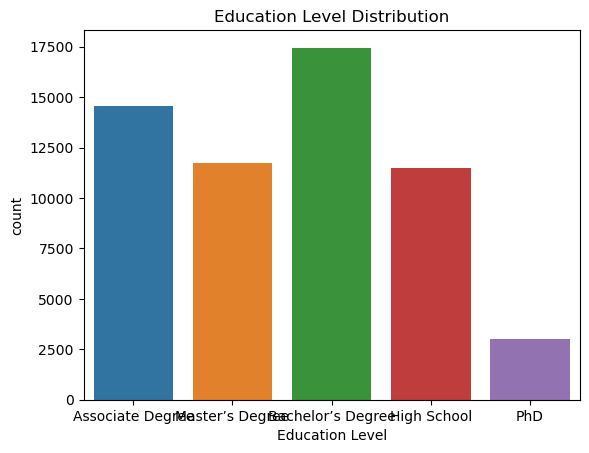

In [64]:
# Show Education Level Distribution

sns.countplot(data=data, x='Education Level')
plt.title("Education Level Distribution")
plt.show() 

In [121]:
# Calculate Average Promotions

print("Average Promotions : ",data['Number of Promotions'].mean())

Average Promotions :  0.8337856406733082


In [107]:
# Calculate Promotions Rate 

promotion_rate = (data['Number of Promotions'] > 0).mean() * 100
print(f"Promotion Rate: {promotion_rate:.2f}%")

Promotion Rate: 50.20%


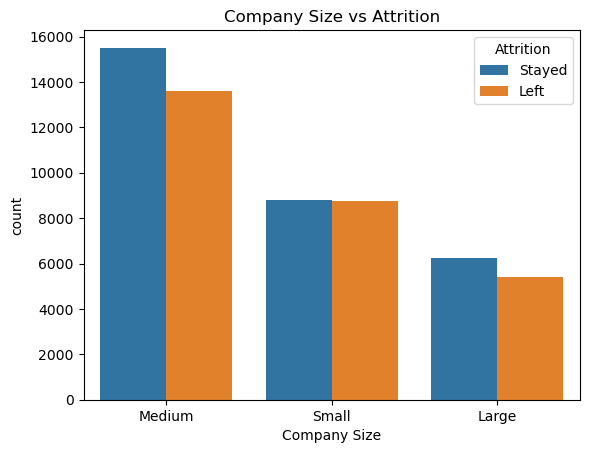

In [82]:
# Attrition by Company Size

sns.countplot(data=data, x='Company Size', hue='Attrition')
plt.title("Company Size vs Attrition")
plt.show()

In [97]:
# Avarege monthly rate 

AMR = data['Monthly Income'].median()
MAX_income = data['Monthly Income'].max()
MIN_income = data['Monthly Income'].min()

print("Maximum monthly rate :",MAX_income,"$")
print("Avarege monthly rate :",AMR,"$")
print("Minimum monthly rate :",MIN_income,"$")

Maximum monthly rate : 16149 $
Avarege monthly rate : 7354.0 $
Minimum monthly rate : 1316 $


In [103]:
# Average Income by Job Level

income_by_level = data.groupby('Job Level')['Monthly Income'].mean()
print(income_by_level)

Job Level
Entry     7325.714108
Mid       7279.832910
Senior    7301.623131
Name: Monthly Income, dtype: float64


In [95]:
# Avarege years at company 

Avg_year_company = data['Years at Company'].median()

print("Avarege years at company :",Avg_year_company,"Years")

Avarege years at company : 13.0 Years


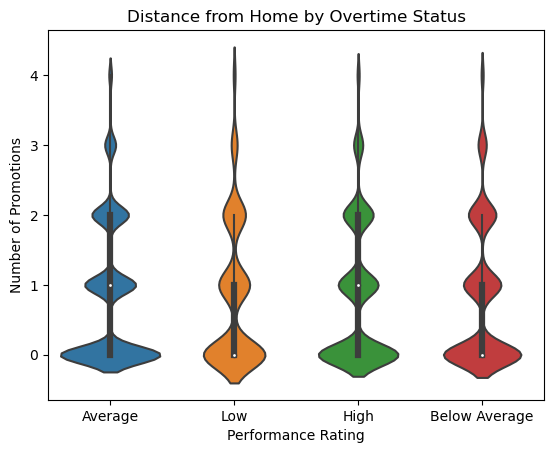

In [129]:
# Is there a link between promotions and performance ratings

sns.violinplot(x='Performance Rating', y='Number of Promotions', data=data)
plt.title("Distance from Home by Overtime Status")
plt.show()

### - Check Outlier Using:-
- 1- Boxplot.
- 2- IQR (Interquartile Range)

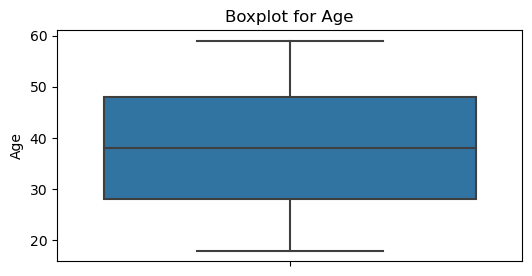

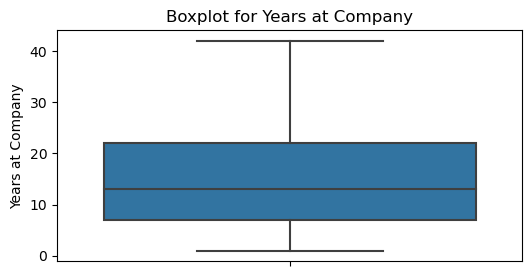

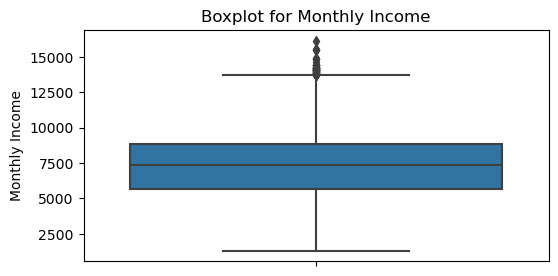

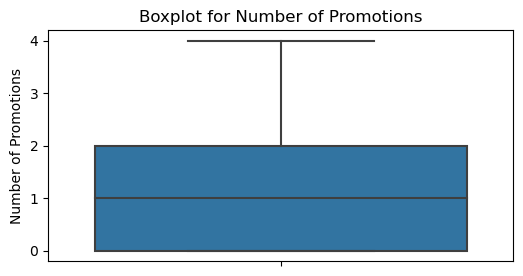

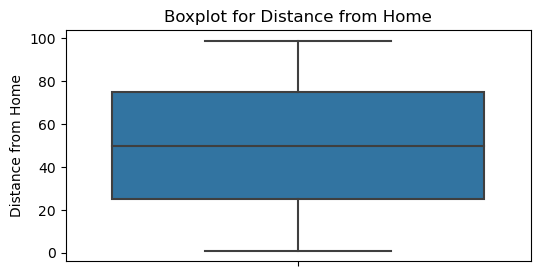

In [9]:
# Check Outlier by Boxplot

numerical = ['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home']

for col in numerical:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=data, y=col, orient='v')
    plt.title(f"Boxplot for {col}")
    plt.show()

In [10]:
# Check outliers using IQR 
# caLculate how much outliers in Monthly Income

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected")
    return outliers

# Monthly Income
outliers_income = detect_outliers_iqr(data, 'Monthly Income')

Monthly Income: 49 outliers detected


In [14]:
# Delete outliers 

data = data.drop(outliers_income.index)

In [15]:
# caLculate how much outliers After Droping the outliers

outliers_income = detect_outliers_iqr(data, 'Monthly Income')

Monthly Income: 0 outliers detected


###### - There is no any outliers

In [142]:
# Top 5 Employees in Monthly Income

data.sort_values(by='Monthly Income',ascending=False).head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition,AgeGroup
49466,1702,24,Male,2,Finance,13713,Excellent,Low,High,0,No,67,Associate Degree,Single,Entry,Medium,No,Left,18-25
9960,7517,42,Male,27,Finance,13705,Fair,Medium,Average,2,No,48,Bachelor’s Degree,Married,Entry,Small,No,Left,36-45
14299,40338,43,Female,25,Technology,13666,Poor,Very High,Average,0,No,84,Associate Degree,Married,Mid,Medium,No,Left,36-45
815,57056,24,Male,2,Finance,13664,Fair,Low,Below Average,1,Yes,27,Master’s Degree,Single,Senior,Small,No,Left,18-25
43942,19702,56,Male,35,Finance,13657,Poor,Low,Average,1,No,54,Master’s Degree,Single,Mid,Medium,No,Left,46-60


In [137]:
# Performance Rating Distribution

data['Performance Rating'].value_counts()

Average          34987
High             11599
Below Average     8751
Low               2883
Name: Performance Rating, dtype: int64

In [146]:
# Top 5 Performance Rating Employees and Stayed in the company

data[(data['Performance Rating'] == 'High') & (data['Attrition'] == 'Stayed')].head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition,AgeGroup
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,Mid,Small,Yes,Stayed,36-45
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,No,5,Master’s Degree,Married,Entry,Medium,No,Stayed,46-60
13,28098,31,Male,22,Healthcare,8090,Fair,Medium,High,4,Yes,30,Associate Degree,Divorced,Mid,Small,No,Stayed,26-35
18,17034,49,Female,37,Media,6252,Fair,High,High,2,No,60,Bachelor’s Degree,Divorced,Senior,Medium,No,Stayed,46-60
26,13394,23,Male,13,Technology,12507,Fair,High,High,0,No,86,High School,Single,Mid,Medium,No,Stayed,18-25


## 6) preprocessing and feature scaling:-

In [49]:
# preprocessing and feature sacling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, recall_score,f1_score

# classification Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC
from sklearn.ensemble     import VotingClassifier,RandomForestClassifier

# xgboost (extreme gradient boost)
import xgboost as xgb

In [25]:
# Take A Copy For Machine Learning Modeling 

ML_data = data.copy()

In [26]:
## check the balance of data (target)
class_counts      = ML_data['Attrition'].value_counts()
class_proportions = ML_data['Attrition'].value_counts(normalize=True)

# Count the number of occurrences of each class
print("Class counts:")
print(class_counts)

# Calculate class proportions
print("\nClass proportions:")
print(class_proportions)

Class counts:
Stayed    30487
Left      27733
Name: Attrition, dtype: int64

Class proportions:
Stayed    0.523652
Left      0.476348
Name: Attrition, dtype: float64


In [29]:
# Drop columns that won't help the model

ML_data = ML_data.drop(columns=['Employee ID', 'AgeGroup'])

# Encode target variable

ML_data['Attrition'] = LabelEncoder().fit_transform(ML_data['Attrition'])  # Stayed=0, Left=1

# Encode all object (categorical) columns

for col in ML_data.select_dtypes(include='object').columns:
    ML_data[col] = LabelEncoder().fit_transform(ML_data[col])

In [30]:
# split the data into Features (x) and Target (y)

x = ML_data.drop('Attrition', axis=1)
y = ML_data['Attrition']

In [32]:
# All Attributes Encoded To Numbers

x.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work
0,31,1,19,0,5390,0,2,0,2,0,22,0,1,1,1,0
1,59,0,4,3,5534,3,0,3,3,0,21,3,0,1,1,0
2,24,0,10,2,8159,2,0,3,0,0,11,1,1,1,1,0
3,36,0,7,0,3989,2,0,2,1,0,27,2,2,1,2,1
4,56,1,41,0,4821,1,3,0,0,1,71,2,0,2,1,0


In [33]:
# Target 

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int32

In [34]:
# split the data into train and test 

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.20, shuffle=True,random_state=10)
# that mean 20 % of data for testing and 80 % for training

In [45]:
# check shape

print('X_train shape -- ', x_train.shape)
print('y_train shape -- ', y_train.shape)
print('----------------------------------')
print('X_test shape  -- ' , x_test.shape)
print('y_test shape  -- ' , y_test.shape)
print('----------------------------------')

X_train shape --  (46576, 16)
y_train shape --  (46576,)
----------------------------------
X_test shape  --  (11644, 16)
y_test shape  --  (11644,)
----------------------------------


``Now The dataset is ready for modeling``

## 7) Build ML Model:-

In [54]:
# Logistic Regression

logistic_clr = LogisticRegression()
logistic_clr.fit(x_train,y_train)

# predict and check accuracy
y_pred = logistic_clr.predict(x_test)
acc = accuracy_score(y_test, predicted)

print("✅ Logistic Regression Results")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Logistic Regression Results
Accuracy : 0.691944349020955
Precision: 0.706045299006029
Recall   : 0.7084695879659908
F1 Score : 0.7072553660328081

Confusion Matrix:
 [[3724 1804]
 [1783 4333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67      5528
           1       0.71      0.71      0.71      6116

    accuracy                           0.69     11644
   macro avg       0.69      0.69      0.69     11644
weighted avg       0.69      0.69      0.69     11644



In [69]:
# K-nearest neighbor

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train, y_train)

# Predict
y_pred_knn = knn_model.predict(x_test)

# Evaluate
print("✅ K-Nearest Neighbors Results")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

✅ K-Nearest Neighbors Results
Accuracy : 0.5188079697698386
Precision: 0.5611733842117815
Recall   : 0.38472858077174626
F1 Score : 0.45649432534678436

Confusion Matrix:
 [[3688 1840]
 [3763 2353]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.67      0.57      5528
           1       0.56      0.38      0.46      6116

    accuracy                           0.52     11644
   macro avg       0.53      0.53      0.51     11644
weighted avg       0.53      0.52      0.51     11644



In [60]:
# Support vector machine (polynomial kernel)

svm_model = SVC(kernel='poly', degree=3, probability=True)
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

# Evaluate
print("✅ Support Vector Machine Results")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))

print("F1 Score :", f1_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

✅ Support Vector Machine Results
Accuracy : 0.5252490553074545
Precision: 0.5252490553074545
Recall   : 1.0
F1 Score : 0.6887387387387387

Confusion Matrix:
 [[   0 5528]
 [   0 6116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5528
           1       0.53      1.00      0.69      6116

    accuracy                           0.53     11644
   macro avg       0.26      0.50      0.34     11644
weighted avg       0.28      0.53      0.36     11644



In [71]:
# Random forest

rf_model = RandomForestClassifier(n_estimators=15, random_state=10)
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluate
print("✅ Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

✅ Random Forest Results
Accuracy : 0.7132428718653384
Precision: 0.7237711522965351
Recall   : 0.7343034663178548
F1 Score : 0.7289992695398102

Confusion Matrix:
 [[3814 1714]
 [1625 4491]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      5528
           1       0.72      0.73      0.73      6116

    accuracy                           0.71     11644
   macro avg       0.71      0.71      0.71     11644
weighted avg       0.71      0.71      0.71     11644



In [63]:
# Extreme Gredient Boost Classifier

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10)
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
print("✅ XGBoost Results")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

✅ XGBoost Results
Accuracy : 0.7313637925111646
Precision: 0.7427689307767306
Recall   : 0.7473839110529757
F1 Score : 0.7450692746536267

Confusion Matrix:
 [[3945 1583]
 [1545 4571]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      5528
           1       0.74      0.75      0.75      6116

    accuracy                           0.73     11644
   macro avg       0.73      0.73      0.73     11644
weighted avg       0.73      0.73      0.73     11644



In [64]:
# Create the ensemble

voting_model = VotingClassifier(
    estimators=[
        ('lr', logistic_clr),
        ('knn', knn_model),
        ('svm', svm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # uses predicted probabilities
)

# Train the ensemble
voting_model.fit(x_train, y_train)

# Predict
y_pred_voting = voting_model.predict(x_test)

In [65]:
print("✅ Voting Classifier (Ensemble) Results")
print("Accuracy :", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall   :", recall_score(y_test, y_pred_voting))
print("F1 Score :", f1_score(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))

✅ Voting Classifier (Ensemble) Results
Accuracy : 0.7276709034695981
Precision: 0.7317073170731707
Recall   : 0.7603008502289078
F1 Score : 0.745730093817657

Confusion Matrix:
 [[3823 1705]
 [1466 4650]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71      5528
           1       0.73      0.76      0.75      6116

    accuracy                           0.73     11644
   macro avg       0.73      0.73      0.73     11644
weighted avg       0.73      0.73      0.73     11644



>``The Highest F1 Score is Voting Classifier = 0.75``

> ``The Highest Recall is XGBoost Classifier = 0.75``
> ``The Highest Precision is XGBoost Classifier = 0.74`` 

In [75]:
model_scores = []

# Logistic Regression
model_scores.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
})

# KNN
model_scores.append({
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn)
})

# SVM
model_scores.append({
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm)
})

# Random Forest
model_scores.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
})

# XGBoost
model_scores.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
})

# Voting Classifier
model_scores.append({
    'Model': 'Voting Ensemble',
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'F1 Score': f1_score(y_test, y_pred_voting)
})

# Create DataFrame
results_df = pd.DataFrame(model_scores)

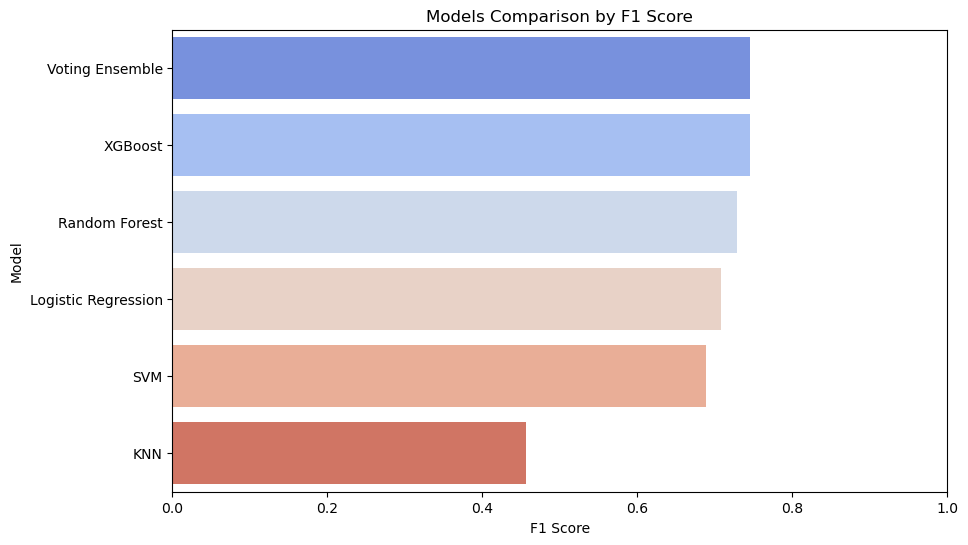

In [78]:
# Plot F1 Score Comparison

plt.figure(figsize=(10, 6))

sns.barplot(x='F1 Score', y='Model', data=results_df.sort_values(by='F1 Score', ascending=False), palette='coolwarm')
plt.title('Models Comparison by F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

## 8) Conclusion And insights :- 

``Questions Answered :-``
- 1- What is the overall attrition rate?
- 2- How does attrition vary by gender, marital status, and age group?
- 3- Which job roles have the highest attrition?
- 4- Does working overtime impact attrition?
- 5- Does remote work reduce the risk of attrition?
- 6- Is there a relationship between distance from home and attrition?
- 7- Is there a relationship between monthly income and attrition?
- 8- What is the distribution of performance ratings?
- 9- Is there a link between promotions and performance ratings?
- 10- What is the age distribution of employees?
- 11- How does attrition vary across different age groups?
- 12- What is the average number of promotions per employee?
- 13- How does attrition differ by company size?
- 14- Top 5 Employees in Monthly Income?
- 15- Top 5 Performance Rating?

``Machine Learning Models Used:-``
- 1- Logistic Regression   
- 2- KNN
- 3- SVM
- 4- Random Forest
- 5- XGBoost
- 6- Voting Classifier

## 9) Model Deployment:- 

In [83]:
# Call library
import joblib

# Save the model
joblib.dump(xgb_model, 'Attrition_Model.pkl')

['Attrition_Model.pkl']

``OPTION 1:-``

In [100]:
%%writefile Attrition_Predict.py   # create file name and save script 
import streamlit as st
import joblib

# Load model
model = joblib.load('Attrition_Model.pkl')

st.title("Employee Attrition Predictor")

# Input form
age                = st.number_input("Age", min_value=18, max_value=70)
gender             = st.selectbox("Gender", options=[0, 1])  # 0 = Female, 1 = Male (example)
years_at_company   = st.number_input("Years at Company", min_value=0)
job_role           = st.selectbox("Job Role", options=range(10))  # customize as needed
monthly_income     = st.number_input("Monthly Income")
work_life_balance  = st.selectbox("Work-Life Balance", options=[0, 1, 2, 3])
job_satisfaction   = st.selectbox("Job Satisfaction", options=[0, 1, 2, 3])
performance_rating = st.selectbox("Performance Rating", options=[0, 1, 2, 3])
num_promotions     = st.number_input("Number of Promotions", min_value=0)
overtime           = st.selectbox("Overtime", options=[0, 1])
distance_from_home = st.number_input("Distance from Home", min_value=0)
education_level    = st.selectbox("Education Level", options=range(5))
marital_status     = st.selectbox("Marital Status", options=range(3))
job_level          = st.selectbox("Job Level", options=range(5))
company_size       = st.selectbox("Company Size", options=range(5))
remote_work        = st.selectbox("Remote Work", options=[0, 1, 2])

# Prediction
if st.button("Predict Attrition"):
    features = [[
        age, gender, years_at_company, job_role, monthly_income,
        work_life_balance, job_satisfaction, performance_rating,
        num_promotions, overtime, distance_from_home, education_level,
        marital_status, job_level, company_size, remote_work
    ]]
    result = model.predict(features)[0]
    st.success(f"Prediction: {'Yes' if result == 1 else 'No'}")

Overwriting Attrition_Predict.py


> ``OPTION 2:-``

In [135]:
%%writefile Attrition_Predict2.py      
import streamlit as st 
import joblib
import numpy as np 
# Load model
model = joblib.load('Attrition_Model.pkl')

# Mappings
job_role_map = {
    "Technology": 4,
    "Finance": 1,
    "Education": 0,
    "Healthcare": 2,
    "Media": 3
}

work_life_balance_map = {
    "Good": 2,
    "Fair": 1,
    "Excellent": 0,
    "Poor": 3
}

job_satisfaction_map = {
    "High": 0,
    "Very High": 3,
    "Medium": 2,
    "Low": 1
}

performance_rating_map = {
    "Average": 0,
    "High": 2,
    "Below Average": 1,
    "Low": 3
}

overtime_map = {
    "No": 0,
    "Yes": 1
}

education_level_map = {
    "Associate Degree": 0,
    "Bachelor’s Degree": 1,
    "High School": 2,
    "Master’s Degree": 3,
    "PhD": 4
}

marital_status_map = {
    "Divorced": 0,
    "Married": 1,
    "Single": 2
}

job_level_map = {
    "Entry": 0,
    "Mid": 1,
    "Senior": 2
}

company_size_map = {
    "Large": 0,
    "Medium": 1,
    "Small": 2
}

remote_work_map = {
    "No": 0,
    "Yes": 1
}

st.title("Employee Attrition Predictor")

# Input fields
age                = st.number_input("Age", min_value=18, max_value=65, value=30)
gender             = st.selectbox("Gender", ["Male", "Female"])
years_at_company   = st.number_input("Years at Company", min_value=0, value=5)
job_role           = st.selectbox("Job Role", list(job_role_map.keys()))
monthly_income     = st.number_input("Monthly Income", min_value=1000, value=5000)
work_life_balance  = st.selectbox("Work-Life Balance", list(work_life_balance_map.keys()))
job_satisfaction   = st.selectbox("Job Satisfaction", list(job_satisfaction_map.keys()))
performance_rating = st.selectbox("Performance Rating", list(performance_rating_map.keys()))
num_promotions     = st.number_input("Number of Promotions", min_value=0, value=0)
overtime           = st.selectbox("Overtime", list(overtime_map.keys()))
distance_from_home = st.slider("Distance from Home", 0, 100, 10)
education_level    = st.selectbox("Education Level", list(education_level_map.keys()))
marital_status     = st.selectbox("Marital Status", list(marital_status_map.keys()))
job_level          = st.selectbox("Job Level", list(job_level_map.keys()))
company_size       = st.selectbox("Company Size", list(company_size_map.keys()))
remote_work        = st.selectbox("Remote Work", list(remote_work_map.keys()))

# Convert input to numeric
gender_val             = 1 if gender == "Male" else 0
job_role_val           = job_role_map[job_role]
work_life_balance_val  = work_life_balance_map[work_life_balance]
job_satisfaction_val   = job_satisfaction_map[job_satisfaction]
performance_rating_val = performance_rating_map[performance_rating]
overtime_val           = overtime_map[overtime]
education_level_val    = education_level_map[education_level]
marital_status_val     = marital_status_map[marital_status]
job_level_val          = job_level_map[job_level]
company_size_val       = company_size_map[company_size]
remote_work_val        = remote_work_map[remote_work]

# Features array
features = np.array([[
    age, gender_val, years_at_company, job_role_val, monthly_income,
    work_life_balance_val, job_satisfaction_val, performance_rating_val,
    num_promotions, overtime_val, distance_from_home, education_level_val,
    marital_status_val, job_level_val, company_size_val, remote_work_val
]])

# Predict
if st.button("Predict Attrition"):
    result = model.predict(features)[0]
    st.success(f"Prediction : {'yes' if result==1 else 'No'}")

Overwriting Attrition_Predict2.py


``Done``